In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

(225, 2)


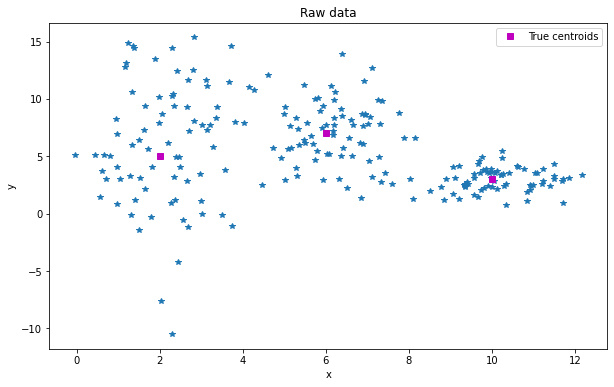

In [11]:
# generate and visualize the data

n = 75 # number of points per cluster

# x-y coordinates of cluster centroids
A, B, C = [2, 5], [6, 7], [10, 3]

# cluster 'smearing' along the x and y axes parameter (std units)
a_smearing, b_smearing, c_smearing = [1, 5], [1, 3], [1, 1]

# data
a = [A[0] + a_smearing[0]*np.random.default_rng().standard_normal(size=n),
     A[1] + a_smearing[1]*np.random.default_rng().standard_normal(size=n)]
b = [B[0] + b_smearing[0]*np.random.default_rng().standard_normal(size=n),
     B[1] + b_smearing[1]*np.random.default_rng().standard_normal(size=n)]
c = [C[0] + c_smearing[0]*np.random.default_rng().standard_normal(size=n),
     C[1] + c_smearing[1]*np.random.default_rng().standard_normal(size=n)]
# concatenate all the data in 1 matrix
data = (np.hstack((a, b, c))).T
print(data.shape)

# visualization
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(data[:, 0], data[:, 1], '*')
ax.plot([A[0], B[0], C[0]], [A[1], B[1], C[1]], 'ms', label='True centroids')
ax.legend()
ax.set(xlabel='x', ylabel='y', title='Raw data');

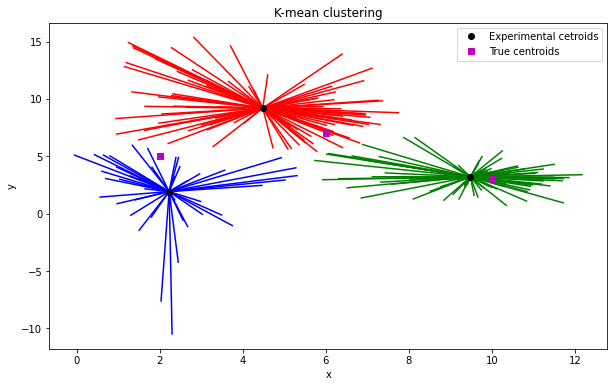

In [12]:
# assume that we know the right number of clusters

fig, ax = plt.subplots(figsize=(10, 6))
colors = 'rgb'

# k-mean clustering is performed here
kmeans = KMeans(n_clusters=3).fit(data)
groupidx = kmeans.predict(data) # group (cluster) labels
cents = kmeans.cluster_centers_ # calculated positions of centroids
    
# draw lines from each data point to the centroids of each cluster
for i in range(0, len(data)):
    ax.plot([data[i, 0], cents[groupidx[i], 0]], 
            [data[i, 1], cents[groupidx[i], 1]], 
            colors[groupidx[i]])

# and now plot the centroid locations
ax.plot(cents[:, 0], cents[:, 1], 'ko', label='Experimental cetroids')
ax.plot([A[0], B[0], C[0]], [A[1], B[1], C[1]], 'ms', label='True centroids')
ax.legend()
ax.set(xlabel='x', ylabel='y', title='K-mean clustering');

'''
Вывод:
Даже если один из априорно заданных кластеров имеет отличное от других std (например, большее),
k-mean clustering уже начинает барахлить при определении центров 
и не является подходящим методом кластеризации.

(Разные стандартные отклонения у данных = разные нормализации)
'''

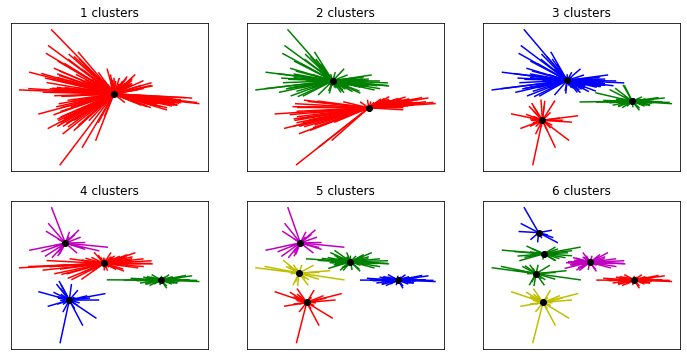

In [4]:
# determining the appropriate number of clusters (qualitative)

fig, ax = plt.subplots(2, 3, figsize=(12, 6))
ax = ax.flatten()
colors = 'rgbmygrymb'

# apply the k-means algorithm using a different number of clusters
for k in range(6):
    # k-mean clustering is performed here
    kmeans = KMeans(n_clusters=k+1).fit(data)
    groupidx = kmeans.predict(data) # group (cluster) labels
    cents = kmeans.cluster_centers_ # calculated positions of centroids
    
    # draw lines from each data point to the centroids of each cluster
    for i in range(0, len(data)):
        ax[k].plot([data[i, 0], cents[groupidx[i], 0]], 
                   [data[i, 1], cents[groupidx[i], 1]], 
                   colors[groupidx[i]])
    
    # and now plot the centroid locations
    ax[k].plot(cents[:, 0], cents[:, 1], 'ko')
    ax[k].set_xticks([])
    ax[k].set_yticks([])
    ax[k].set_title('%g clusters'%(k+1))